<a href="https://colab.research.google.com/github/kvsharma13/stock-price-forecasting-prophet/blob/main/stock_price_forecasting_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📦 Install required libraries
!pip install yfinance prophet --quiet

In [2]:
# 🔧 Import packages
import yfinance as yf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [11]:
# Step 1: Download data
data = yf.download("AAPL", start="2018-01-01", end="2024-12-31")

[*********************100%***********************]  1 of 1 completed


In [15]:
# Step 2: Create a new DataFrame with correct structure
df = pd.DataFrame()
df['ds'] = data.index
df['y'] = data['Close'].values

In [18]:
# Step 3: Ensure correct data types
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df.dropna(subset=['ds', 'y'], inplace=True)

# Preview cleaned data
print(df.head())

          ds          y
0 2018-01-02  40.479832
1 2018-01-03  40.472797
2 2018-01-04  40.660789
3 2018-01-05  41.123714
4 2018-01-08  40.970970


In [19]:
# Step 4: Train Prophet model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp84wt4k_9/x56697zl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp84wt4k_9/ysrfwkot.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62414', 'data', 'file=/tmp/tmp84wt4k_9/x56697zl.json', 'init=/tmp/tmp84wt4k_9/ysrfwkot.json', 'output', 'file=/tmp/tmp84wt4k_9/prophet_modeljbpj9q6l/prophet_model-20250407111847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:18:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:18:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [20]:
# Step 5: Forecast
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

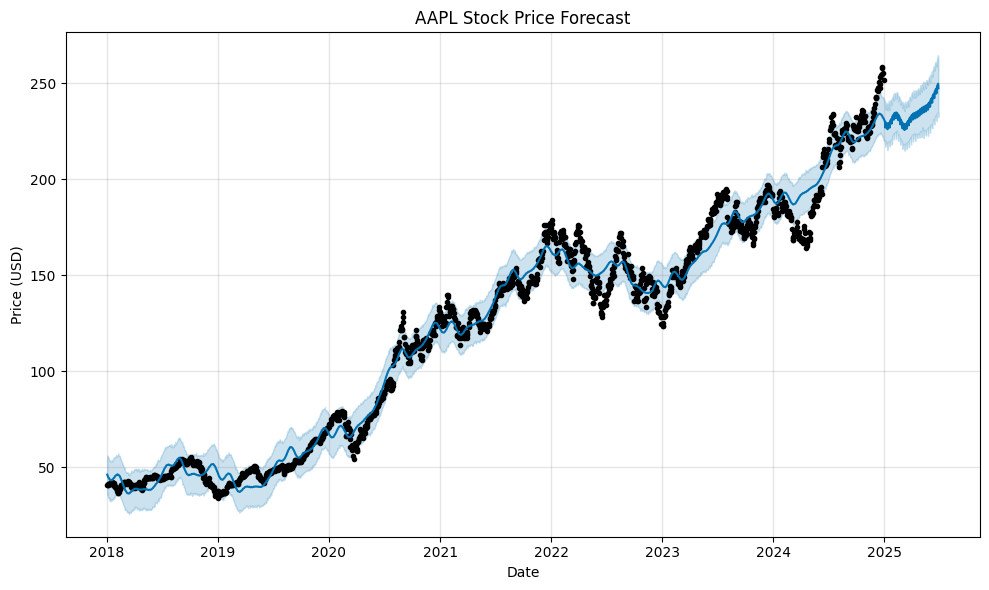

In [21]:
# Step 6: Plot forecast
fig1 = model.plot(forecast)
plt.title("AAPL Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compare only the dates that exist in both actual and predicted
actual = df.set_index('ds')
predicted = forecast.set_index('ds').loc[actual.index]

# Get predicted values from Prophet
y_true = actual['y']
y_pred = predicted['yhat']

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Display
print(f"📊 Accuracy Metrics:")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

📊 Accuracy Metrics:
MAE  (Mean Absolute Error): 6.22
RMSE (Root Mean Squared Error): 7.97
